In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# from torchviz import make_dot
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_item', None)

In [3]:
df = pd.read_csv('Train_data.csv')
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           1.00           0.00                0.00             150   
1           0.08           0.15                0.00             255   
2           0.05           0.07                0.00             255   
3           1.00           0.00                0.00              30   
4           1.00           0.00                0.09             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1                    0.00                    0.60   
2                  26                    0.10                    0.05   
3                 255                    1.00                    0.00   
4                 255                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_hos

In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='count'>

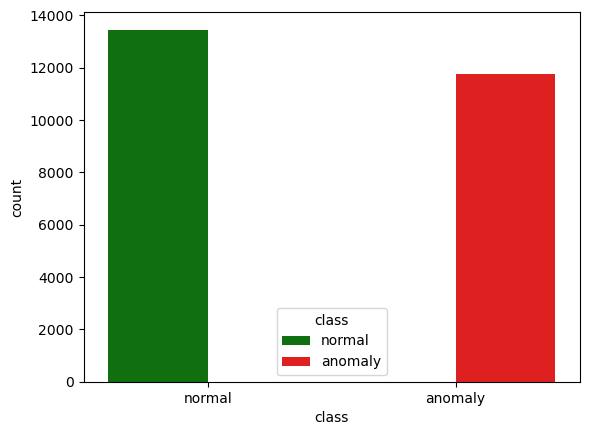

In [5]:
sns.countplot(x=df['class'], palette=['green', 'red'], hue=df['class'])

In [6]:
df['class'] = df['class'].apply(lambda x: 0 if x=="normal" else 1)

<Axes: >

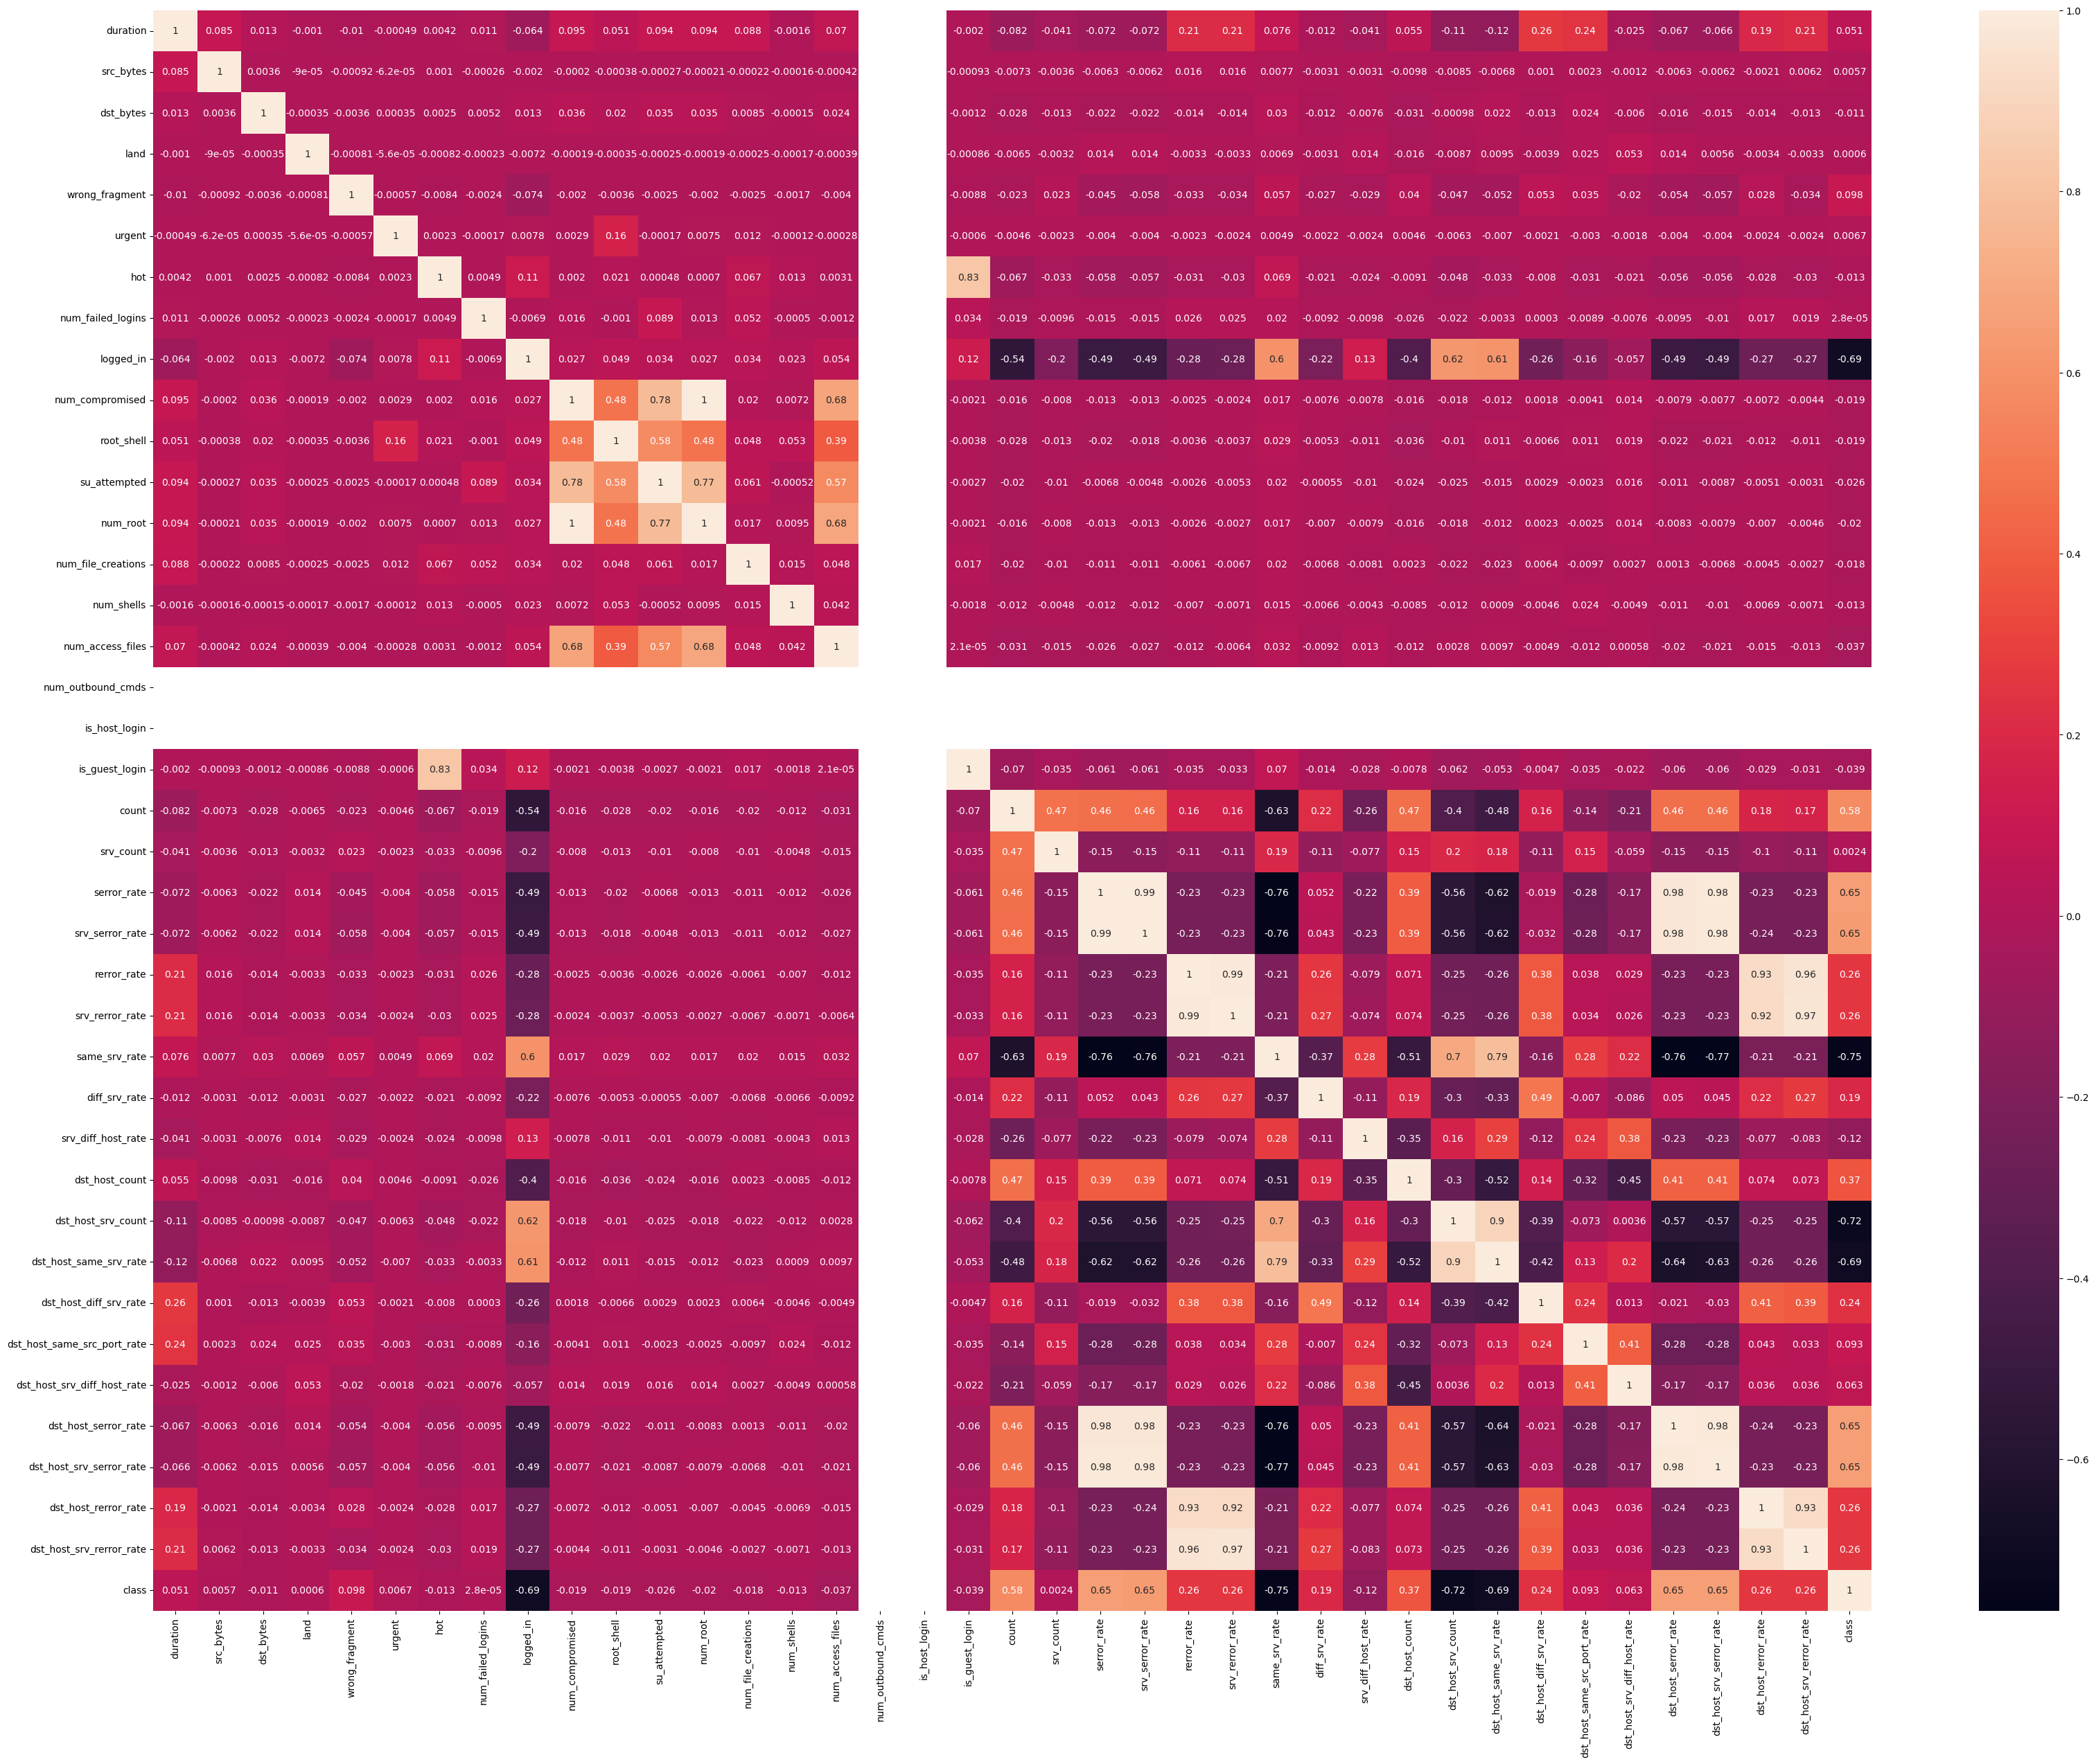

In [7]:
categorical_columns = ['protocol_type', 'service', 'flag']
plt.figure(figsize=(40,30))
sns.heatmap(df.drop(categorical_columns, axis=1).corr(), annot=True)

Text(0, 0.5, 'Destination Host Name Server Rate')

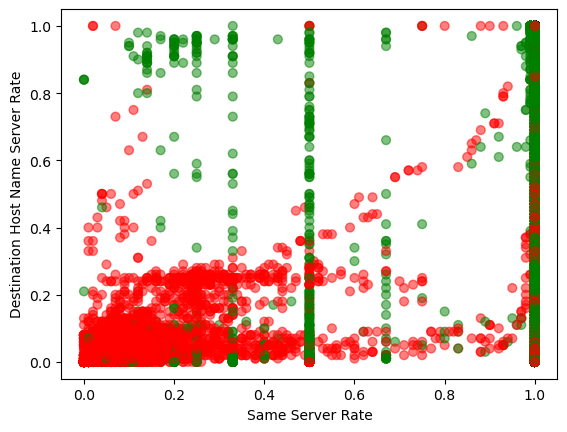

In [8]:
labels = df['class']
colors = ['green','red']
y = df['dst_host_same_srv_rate']
x = df['same_srv_rate']
plt.scatter(x,y, c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=40)
plt.xlabel("Same Server Rate")
plt.ylabel("Destination Host Name Server Rate")

In [9]:
df = df.join(pd.get_dummies(df.loc[:, categorical_columns]))
df = df.drop(categorical_columns, axis=1)

In [10]:
df.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised    root_shell  su_attempted      num_root  \
count     25192.000000  25192.000000  25192.000000  25192.000000   
mean          0.227850      0.001548      0.001350      0.249841   
std          10.417352      0.039316      0.048785     11.500842   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max         884.000000      1.000000      2.000000    975.000000   

       num_file_creations    num_shells  num_access_files  num_outbound_cmds  \
count        25192.000000  25192.000000      25192.000000            25192.0   
mean             0.014727      0.000357          0.004327                0.0   
std              0.529602      0.018898          0.098524                0.0   
min              0.000000      0.000000          0.000000                0.0   
25%              0.000000      0.000000          0.000000                0.0   
50%              0.000000      0.000000          0.000000                0.0   
75%              0.000000      0.000000          0.000000                0.0   
max             40.000000      1.000000          8.000000                0.0   

       is_host_login  is_guest_login         count     srv_count  \
count        25192.0    25192.000000  25192.000000  25192.000000   
mean             0.0        0.009130     84.591180     27.698754   
std              0.0        0.095115    114.673451     72.468242   
min              0.0        0.000000      1.000000      1.000000   
25%              0.0        0.000000      2.000000      2.000000   
50%              0.0        0.000000     14.000000      8.000000   
75%              0.0        0.000000    144.000000     18.000000   
max              0.0        1.000000    511.000000    511.000000   

        serror_rate  srv_serror_rate   rerror_rate  srv_rerror_rate  \
count  25192.000000     25192.000000  25192.000000     25192.000000   
mean       0.286338         0.283762      0.118630         0.120260   
std        0.447312         0.447599      0.318745         0.322335   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000      0.000000         0.000000   
50%        0.000000         0.000000      0.000000         0.000000   
75%        1.000000         1.000000      0.000000         0.000000   
max        1.000000         1.000000      1.000000         1.000000   

       same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'], test_size=0.2, random_state=12)
print("Shape of the training input X:", X_train.shape)
print("Shape of the training output y:", y_train.shape)
print("Shape of the testing input X:", X_test.shape)
print("Shape of the testing output y:", y_test.shape)

Shape of the training input X: (20153, 118)
Shape of the training output y: (20153,)
Shape of the testing input X: (5039, 118)
Shape of the testing output y: (5039,)


In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [13]:
pca = PCA(n_components = 10)

X_train_PCA = pca.fit_transform(X_train_norm)
X_test_PCA = pca.transform(X_test_norm)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.0834838 , 0.05251576, 0.03534561, 0.03201952, 0.02585131,
       0.02270659, 0.01908109, 0.01513117, 0.01365296, 0.01246227])

<Axes: >

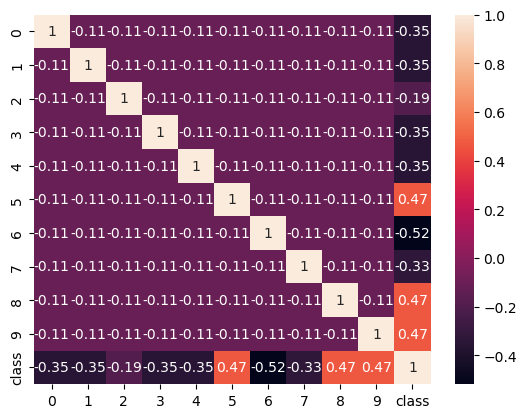

In [14]:
df_PCA = pd.DataFrame(X_train_PCA).corr()
df_PCA['class'] = y_train
sns.heatmap(df_PCA.corr(), annot=True)

In [15]:
x = list(map(lambda x: x[0], X_train_PCA))
y = list(map(lambda x: x[1], X_train_PCA))
z = list(map(lambda x: x[2], X_train_PCA))

Text(0, 0.5, 'Second PCA Component')

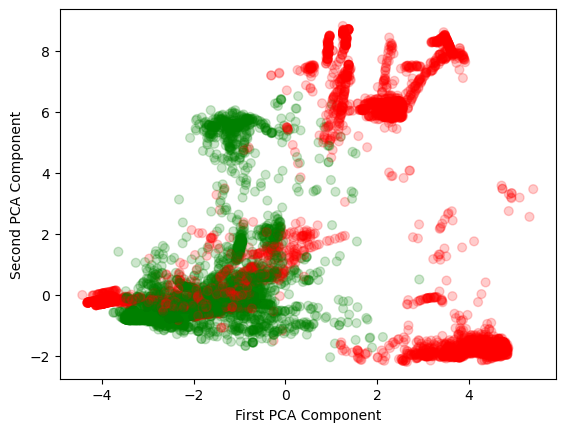

In [16]:
labels = y_train
colors = matplotlib.colors.ListedColormap(['green','red'])
plt.scatter(x,y, c=labels, cmap=colors, alpha=0.2, s=40)
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")

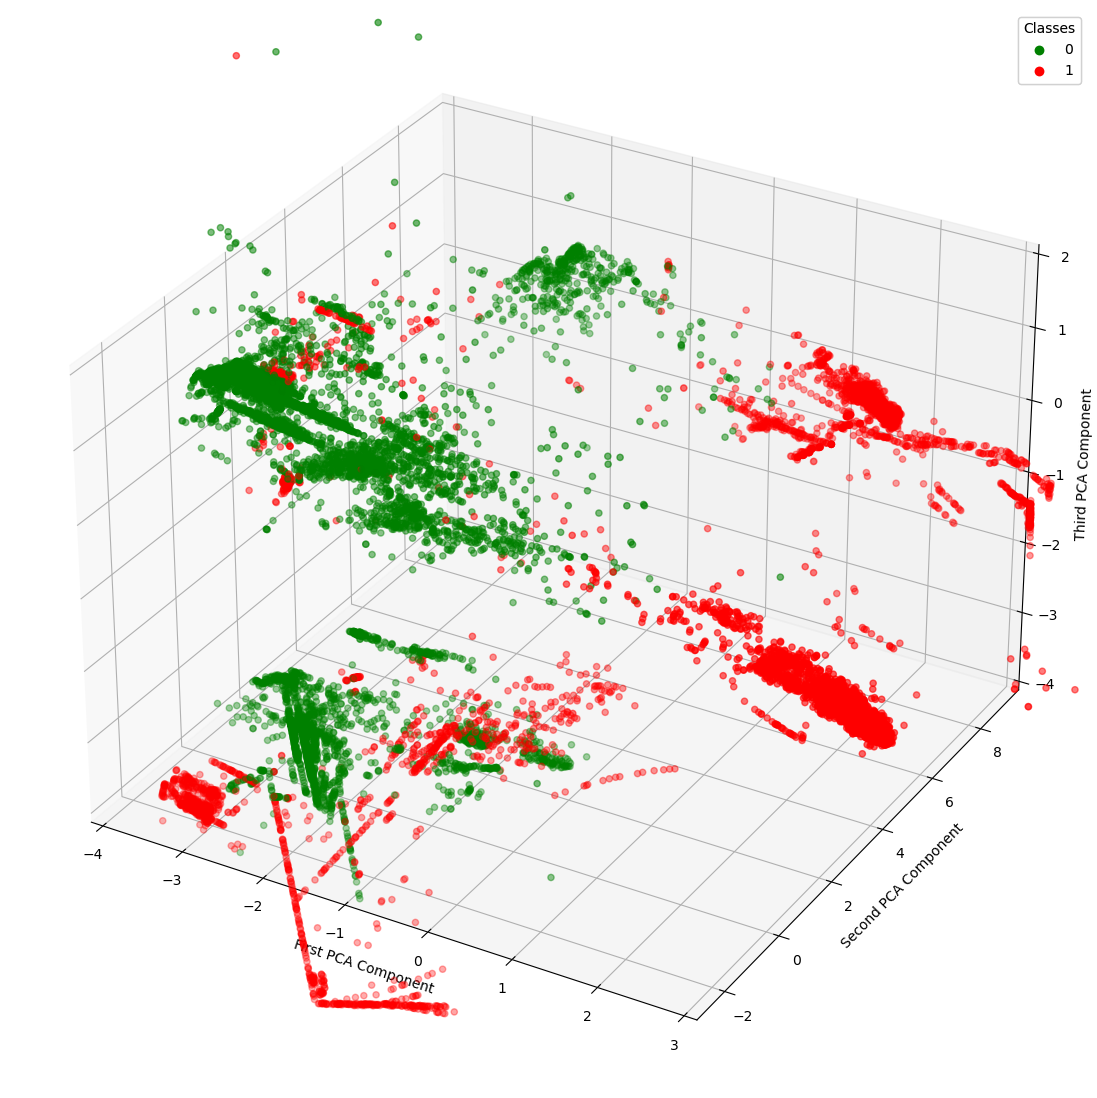

In [17]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
labels = y_train

# Creating plot
scatter = ax.scatter3D(x, y, z, c=labels, cmap=colors)
ax.set_zlim(-4,2)
ax.set_xlim(-4,3)
ax.set_xlabel("First PCA Component")
ax.set_ylabel("Second PCA Component")
ax.set_zlabel("Third PCA Component")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

In [18]:
def print_error_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    prc = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print('Accuracy: {:.5f}'.format(acc))
    print('Precision: {:.5f}'.format(prc))
    print('F1 Score: {:.5f}'.format(f1))

### Logistic Regression Models

In [19]:
regressor = LogisticRegression(max_iter=100, penalty='none')
regressor.fit(X_train_PCA, y_train)
y_pred = regressor.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Accuracy: 0.95614
Precision: 0.96521
F1 Score: 0.95201


/Users/aayushman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [20]:
regressor = LogisticRegression(max_iter=400, solver='saga', penalty='elasticnet', l1_ratio=0.5)
regressor.fit(X_train_PCA, y_train)
y_pred = regressor.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Accuracy: 0.95575
Precision: 0.96518
F1 Score: 0.95155


In [21]:
dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(X_train_PCA, y_train)
print("Decision tree maximum depth:", dtree.tree_.max_depth)
y_pred = dtree.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Decision tree maximum depth: 20
Accuracy: 0.98948
Precision: 0.98511
F1 Score: 0.98869


In [22]:
from matplotlib.colors import to_rgb

features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']
fig = plt.figure(figsize=(100,90))
class_colors=['green', 'red']
artists = plot_tree(dtree, feature_names=features, class_names=['Normal', 'Anomaly'], filled=True, rounded=True, fontsize=10)
for artist, impurity, value in zip(artists, dtree.tree_.impurity, dtree.tree_.value):
    r, g, b = to_rgb(class_colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')
fig.savefig('decision_tree_1.png')

In [23]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_PCA, y_train)
print("Decision tree maximum depth:", dtree.tree_.max_depth)
y_pred = dtree.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Decision tree maximum depth: 5
Accuracy: 0.97658
Precision: 0.98007
F1 Score: 0.97458


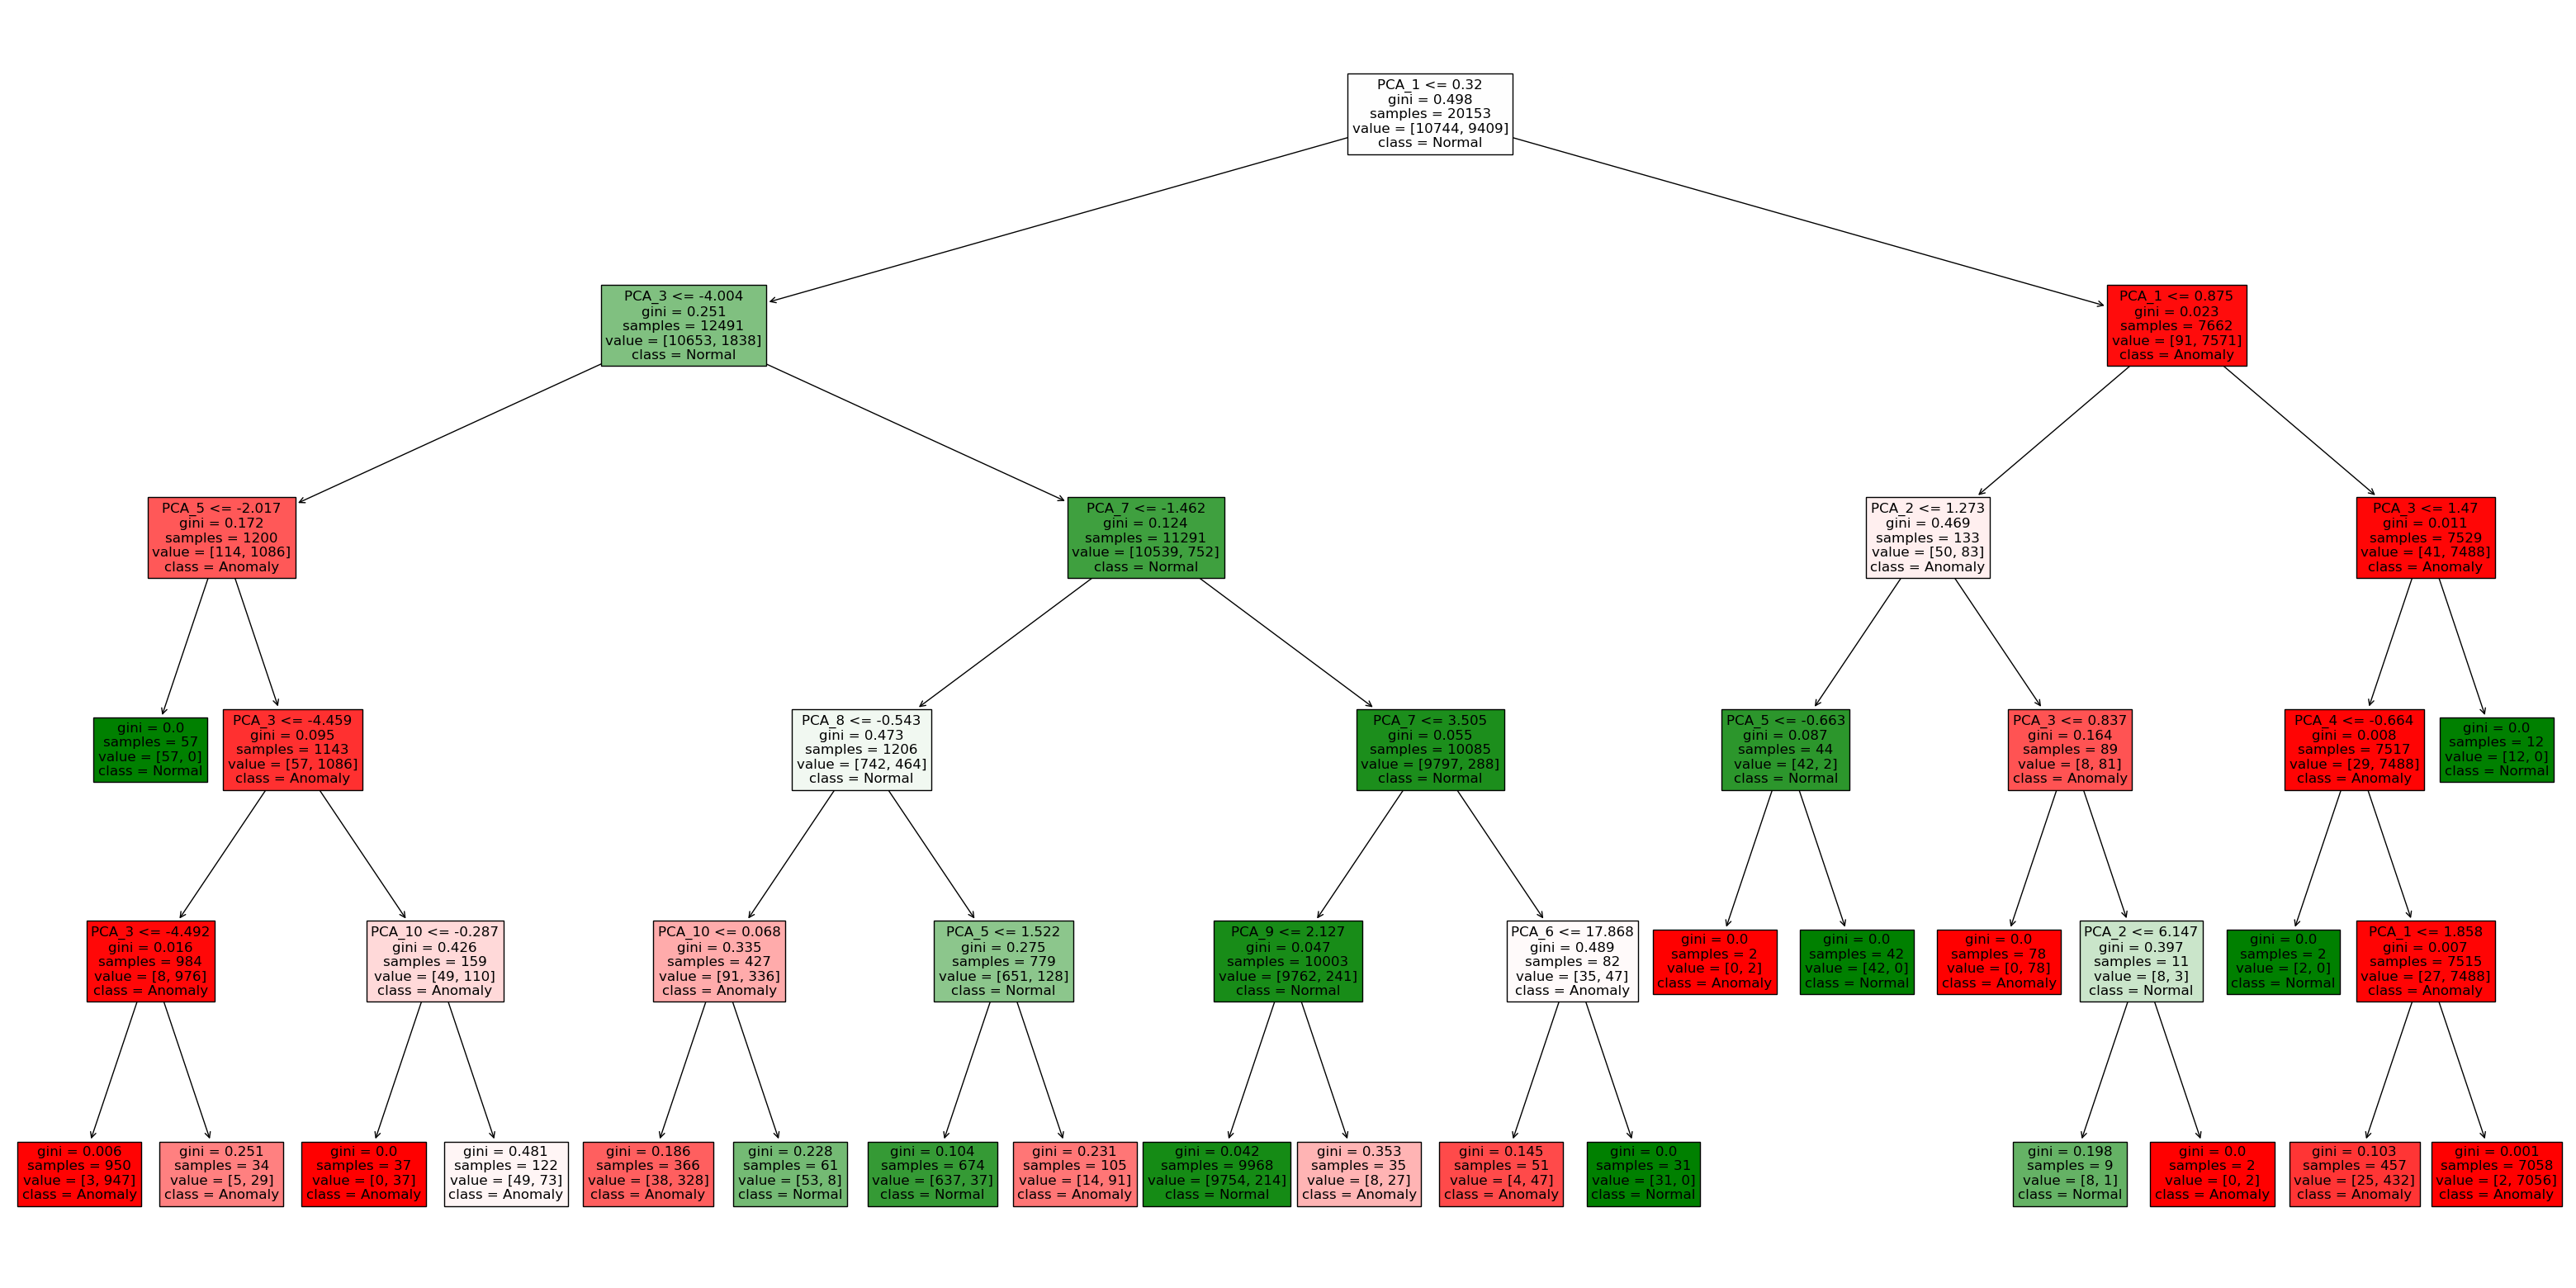

In [24]:
features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']
fig = plt.figure(figsize=(40,20))
artists = plot_tree(dtree, feature_names=features, class_names=['Normal', 'Anomaly'], filled=True, fontsize=12)
for artist, impurity, value in zip(artists, dtree.tree_.impurity, dtree.tree_.value):
    r, g, b = to_rgb(class_colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')
fig.savefig('decision_tree_2.png')

### Neural network

In [25]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(118, 20)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(20, 10)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(10, 1)
        self.sigm = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigm(x)
        return x

In [26]:
model = SimpleNN()

In [27]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
dataset = TensorDataset(torch.from_numpy(X_train_norm).type(torch.float), torch.from_numpy(y_train.to_numpy()).type(torch.float))
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [29]:
X_test_DNN = torch.from_numpy(X_test_norm).type(torch.float)
y_test_DNN = torch.from_numpy(y_test.to_numpy()).type(torch.float)

In [30]:
epochs = 20
loss_value = 0.0
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    i = 0
    for _batch_idx, (features, labels) in enumerate(tqdm(train_loader)):
        i += 1
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(features).squeeze()
        # print(outputs, labels)
        # Calculate the loss
        # print(outputs, labels, criterion(outputs, labels))
        # break
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        loss_value += loss.item()
    train_loss.append(loss_value/i)
    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_DNN).squeeze()
        test_loss_val = criterion(test_pred, y_test_DNN).item()
        test_loss.append(test_loss_val)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss_value/i:.10f}, Test Loss: {test_loss_val:.10f}')
    loss_value = 0.0
print(train_loss)

100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1295.78it/s]


Epoch 1/20, Training Loss: 0.2140072229, Test Loss: 0.0769933015


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1641.56it/s]


Epoch 2/20, Training Loss: 0.0640802301, Test Loss: 0.0532280095


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1624.20it/s]


Epoch 3/20, Training Loss: 0.0457822046, Test Loss: 0.0409528576


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1632.28it/s]


Epoch 4/20, Training Loss: 0.0362678151, Test Loss: 0.0346521437


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1523.76it/s]


Epoch 5/20, Training Loss: 0.0303533365, Test Loss: 0.0304357000


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1628.02it/s]


Epoch 6/20, Training Loss: 0.0264435770, Test Loss: 0.0263502840


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1616.26it/s]


Epoch 7/20, Training Loss: 0.0241846795, Test Loss: 0.0272026900


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1412.33it/s]


Epoch 8/20, Training Loss: 0.0222937621, Test Loss: 0.0240674727


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1535.04it/s]


Epoch 9/20, Training Loss: 0.0206147376, Test Loss: 0.0222928226


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1602.84it/s]


Epoch 10/20, Training Loss: 0.0196269388, Test Loss: 0.0208646674


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1606.48it/s]


Epoch 11/20, Training Loss: 0.0190051839, Test Loss: 0.0211282838


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1629.90it/s]


Epoch 12/20, Training Loss: 0.0178744316, Test Loss: 0.0220953040


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1620.65it/s]


Epoch 13/20, Training Loss: 0.0173421485, Test Loss: 0.0221088100


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1610.37it/s]


Epoch 14/20, Training Loss: 0.0170065362, Test Loss: 0.0211862121


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1620.67it/s]


Epoch 15/20, Training Loss: 0.0161879809, Test Loss: 0.0216216706


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1615.57it/s]


Epoch 16/20, Training Loss: 0.0157934439, Test Loss: 0.0208246987


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1619.51it/s]


Epoch 17/20, Training Loss: 0.0158312961, Test Loss: 0.0206415355


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1622.84it/s]


Epoch 18/20, Training Loss: 0.0148098839, Test Loss: 0.0202384181


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1639.74it/s]


Epoch 19/20, Training Loss: 0.0142263699, Test Loss: 0.0224769786


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1613.95it/s]

Epoch 20/20, Training Loss: 0.0139946246, Test Loss: 0.0213206988
[0.21400722291261431, 0.06408023010821097, 0.04578220462574372, 0.036267815115639854, 0.030353336482464025, 0.026443576953551245, 0.024184679491851952, 0.022293762089813957, 0.020614737629084775, 0.01962693882616429, 0.019005183850799405, 0.01787443160137627, 0.01734214850982267, 0.017006536178087117, 0.016187980902586354, 0.01579344393098764, 0.015831296139979727, 0.014809883920298446, 0.014226369869512772, 0.013994624635106737]


<function matplotlib.pyplot.show(close=None, block=None)>

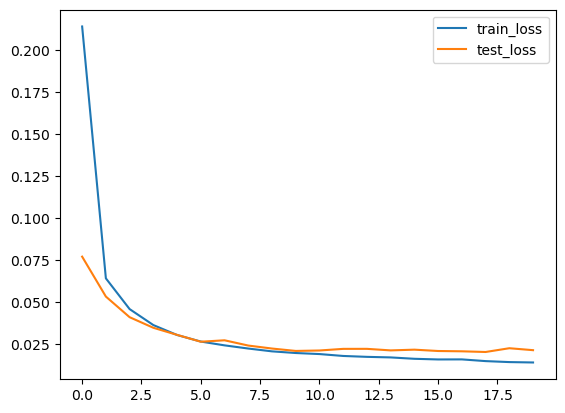

In [31]:
plt.plot(train_loss, label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.legend()
plt.show

In [32]:
model = SimpleNN()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
loss_value = 0.0
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    i = 0
    for _batch_idx, (features, labels) in enumerate(tqdm(train_loader)):
        i += 1
        optimizer.zero_grad()
        outputs = model(features).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_value += loss.item()
    train_loss.append(loss_value/i)

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_DNN).squeeze()
        test_loss_val = criterion(test_pred, y_test_DNN).item()
        test_loss.append(test_loss_val)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss_value/i:.10f}, Test Loss: {test_loss_val:.10f}')
    loss_value = 0.0
print(train_loss)

100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1439.36it/s]


Epoch 1/5, Training Loss: 0.2318063544, Test Loss: 0.0860630572


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1617.85it/s]


Epoch 2/5, Training Loss: 0.0743359715, Test Loss: 0.0640232861


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1622.51it/s]


Epoch 3/5, Training Loss: 0.0564742880, Test Loss: 0.0520408638


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1643.76it/s]


Epoch 4/5, Training Loss: 0.0436178529, Test Loss: 0.0424645580


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1580.56it/s]


Epoch 5/5, Training Loss: 0.0354405588, Test Loss: 0.0348006636
[0.23180635435477134, 0.07433597145395146, 0.056474288025250036, 0.043617852880722945, 0.03544055882043072]


<function matplotlib.pyplot.show(close=None, block=None)>

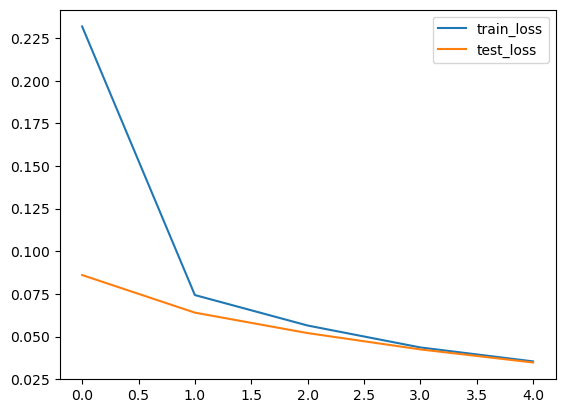

In [33]:
plt.plot(train_loss, label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.legend()
plt.show

In [34]:
model.eval()
with torch.inference_mode():
    # 1. Forward pass
    test_pred = model(X_test_DNN).squeeze()

    # 2. Caculate loss/accuracy
    test_loss = criterion(test_pred, y_test_DNN)
    # test_acc = metrics.accuracy_score(y_test, test_pred)
    y_pred = []
    for pred in test_pred:
        if pred>0.5: y_pred.append(1)
        else: y_pred.append(0)
    print_error_metrics(y_test_DNN, y_pred)

Accuracy: 0.98670
Precision: 0.98879
F1 Score: 0.98560


In [35]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.591387179996031


In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Create and train the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg), 
    ('dt', dtree), 
    ('rf', rf)
], voting='hard')

voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Combined Model Accuracy:", accuracy)

/Users/aayushman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Combined Model Accuracy: 0.9972216709664616
